In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')

In [2]:
book = pd.read_csv('book.csv')
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
book.shape

(2000, 11)

## EDA

In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
book.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
book.duplicated().sum()

1680

In [8]:
book = book.drop_duplicates()

In [9]:
count= book.sum()

In [10]:
for i in book.columns:
    print(i)    
    print(book[i].value_counts())
    print()
    

ChildBks
1    196
0    124
Name: ChildBks, dtype: int64

YouthBks
0    176
1    144
Name: YouthBks, dtype: int64

CookBks
1    218
0    102
Name: CookBks, dtype: int64

DoItYBks
0    163
1    157
Name: DoItYBks, dtype: int64

RefBks
1    162
0    158
Name: RefBks, dtype: int64

ArtBks
1    178
0    142
Name: ArtBks, dtype: int64

GeogBks
1    167
0    153
Name: GeogBks, dtype: int64

ItalCook
0    213
1    107
Name: ItalCook, dtype: int64

ItalAtlas
0    269
1     51
Name: ItalAtlas, dtype: int64

ItalArt
0    259
1     61
Name: ItalArt, dtype: int64

Florence
0    218
1    102
Name: Florence, dtype: int64



# Data Visualization

Text(0.5, 1.0, 'Book frequency')

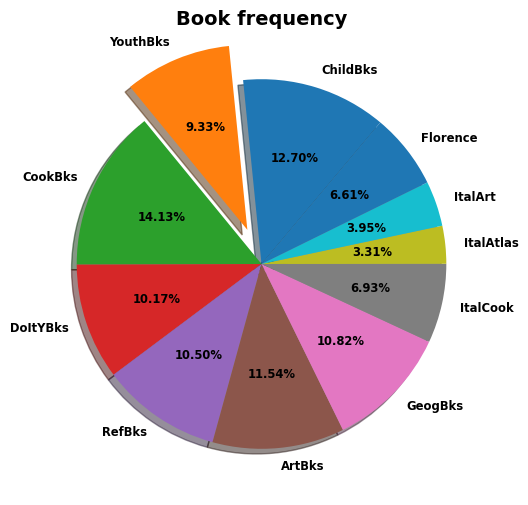

In [11]:
plt.figure(figsize=(10,6))
plt.pie(book.sum(),explode=[0,0.2,0,0,0,0,0,0,0,0,0],labels=book.columns,shadow=True,autopct='%.2f%%',
             startangle=50,textprops={'size':'small','fontweight':'bold','rotation':'horizontal','color':'black'})

plt.title('Book frequency',fontweight='bold',fontsize=14)

In [12]:
count.sort_values(0 , ascending=False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename({'index':'item',0:'count'},axis=1)

In [13]:
count

,item,count
0,CookBks,218
1,ChildBks,196
2,ArtBks,178
3,GeogBks,167
4,RefBks,162
5,DoItYBks,157
6,YouthBks,144
7,ItalCook,107
8,Florence,102
9,ItalArt,61


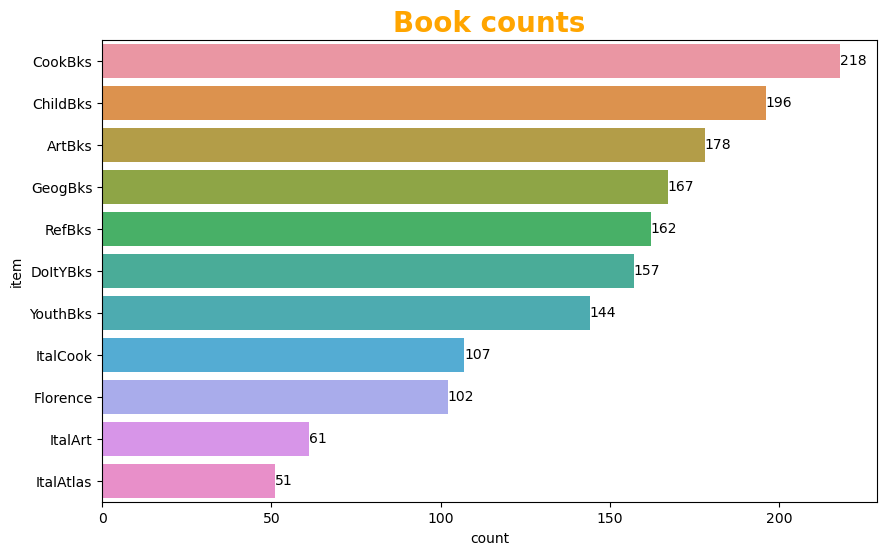

In [14]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=count,x='count',y='item')
plt.title('Book counts',fontsize=20,fontweight='bold',color='orange')
for i in ax.containers:
    ax.bar_label(i,)

## Apriori Algorithm

## 1. Association rules 20% support with 50% confidence

In [15]:
freq_pat = apriori(book, min_support=0.2,use_colnames=True)
freq_pat

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(ChildBks, YouthBks)"


In [16]:
a = association_rules(freq_pat,metric='confidence',min_threshold=0.5)
a

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.450000,0.612500,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
1,(CookBks),(ChildBks),0.681250,0.612500,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
2,(ChildBks),(CookBks),0.612500,0.681250,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(ChildBks),(DoItYBks),0.612500,0.490625,0.315625,0.515306,1.050305,0.015117,1.050921,0.123603
4,(DoItYBks),(ChildBks),0.490625,0.612500,0.315625,0.643312,1.050305,0.015117,1.086384,0.094029
...,...,...,...,...,...,...,...,...,...,...
60,"(CookBks, ArtBks)",(DoItYBks),0.384375,0.490625,0.206250,0.536585,1.093677,0.017666,1.099178,0.139132
61,"(DoItYBks, ArtBks)",(CookBks),0.290625,0.681250,0.206250,0.709677,1.041728,0.008262,1.097917,0.056468
62,"(CookBks, GeogBks)",(ArtBks),0.362500,0.556250,0.212500,0.586207,1.053855,0.010859,1.072396,0.080161
63,"(CookBks, ArtBks)",(GeogBks),0.384375,0.521875,0.212500,0.552846,1.059345,0.011904,1.069261,0.090997


Text(0.5, 1.0, 'Association Rule')

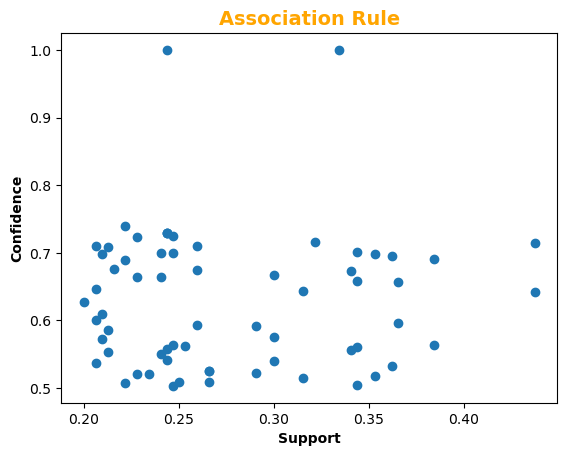

In [17]:
plt.scatter(a['support'],a['confidence'])
plt.xlabel('Support',fontweight='bold')
plt.ylabel('Confidence',fontweight='bold')
plt.title('Association Rule',fontsize = 14,fontweight='bold',color='orange')


## 2. Association rules 30% support with 60% confidence

In [18]:
freq_pat1 = apriori(book,min_support=0.3,use_colnames=True)
freq_pat1

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.334375,(ItalCook)
8,0.318750,(Florence)
9,0.300000,"(ChildBks, YouthBks)"


In [19]:
a1 = association_rules(freq_pat1,metric='confidence',min_threshold=0.6)
a1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.450000,0.61250,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
1,(CookBks),(ChildBks),0.681250,0.61250,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
2,(ChildBks),(CookBks),0.612500,0.68125,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(DoItYBks),(ChildBks),0.490625,0.61250,0.315625,0.643312,1.050305,0.015117,1.086384,0.094029
4,(RefBks),(ChildBks),0.506250,0.61250,0.340625,0.672840,1.098513,0.030547,1.184434,0.181628
5,(ArtBks),(ChildBks),0.556250,0.61250,0.365625,0.657303,1.073148,0.024922,1.130738,0.153605
6,(GeogBks),(ChildBks),0.521875,0.61250,0.343750,0.658683,1.075400,0.024102,1.135307,0.146643
7,(YouthBks),(CookBks),0.450000,0.68125,0.321875,0.715278,1.049949,0.015313,1.119512,0.086496
8,(DoItYBks),(CookBks),0.490625,0.68125,0.343750,0.700637,1.028458,0.009512,1.064761,0.054322
9,(RefBks),(CookBks),0.506250,0.68125,0.353125,0.697531,1.023899,0.008242,1.053827,0.047272


Text(0.5, 1.0, 'Association Rule')

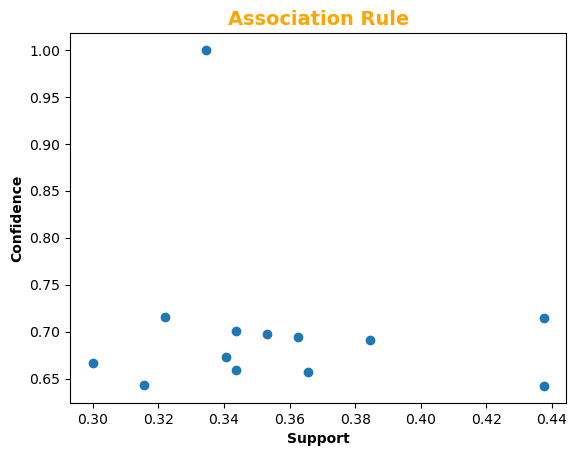

In [20]:
plt.scatter(a1['support'],a1['confidence'])
plt.xlabel('Support',fontweight='bold')
plt.ylabel('Confidence',fontweight='bold')
plt.title('Association Rule',fontsize = 14,fontweight='bold',color='orange')


## 3. Association rules 40% support with 65% confidence

In [21]:
freq_pat3 = apriori(book,min_support=0.4,use_colnames=True)
freq_pat3

,support,itemsets
0,0.612500,(ChildBks)
1,0.450000,(YouthBks)
2,0.681250,(CookBks)
3,0.490625,(DoItYBks)
4,0.506250,(RefBks)
5,0.556250,(ArtBks)
6,0.521875,(GeogBks)
7,0.437500,"(CookBks, ChildBks)"


In [22]:
a2 = association_rules(freq_pat3,metric='confidence',min_threshold=0.6)
a2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.68125,0.61250,0.4375,0.642202,1.048493,0.020234,1.083013,0.145098
1,(ChildBks),(CookBks),0.61250,0.68125,0.4375,0.714286,1.048493,0.020234,1.115625,0.119355


Text(0.5, 1.0, 'Association Rule')

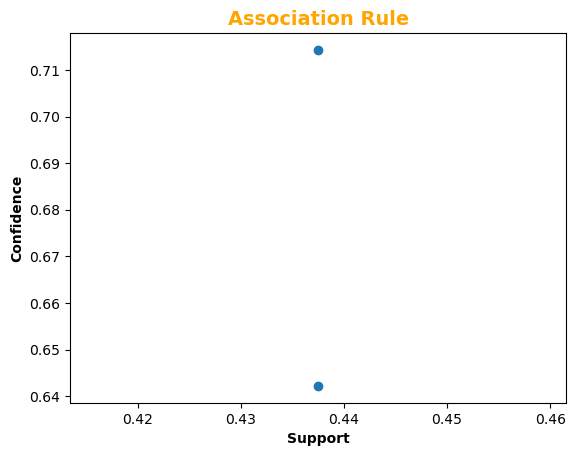

In [23]:
plt.scatter(a2['support'],a2['confidence'])
plt.xlabel('Support',fontweight='bold')
plt.ylabel('Confidence',fontweight='bold')
plt.title('Association Rule',fontsize = 14,fontweight='bold',color='orange')

In [24]:
lift = a1[a1.lift>1]
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.450000,0.61250,0.300000,0.666667,1.088435,0.024375,1.162500,0.147727
1,(CookBks),(ChildBks),0.681250,0.61250,0.437500,0.642202,1.048493,0.020234,1.083013,0.145098
2,(ChildBks),(CookBks),0.612500,0.68125,0.437500,0.714286,1.048493,0.020234,1.115625,0.119355
3,(DoItYBks),(ChildBks),0.490625,0.61250,0.315625,0.643312,1.050305,0.015117,1.086384,0.094029
4,(RefBks),(ChildBks),0.506250,0.61250,0.340625,0.672840,1.098513,0.030547,1.184434,0.181628
5,(ArtBks),(ChildBks),0.556250,0.61250,0.365625,0.657303,1.073148,0.024922,1.130738,0.153605
6,(GeogBks),(ChildBks),0.521875,0.61250,0.343750,0.658683,1.075400,0.024102,1.135307,0.146643
7,(YouthBks),(CookBks),0.450000,0.68125,0.321875,0.715278,1.049949,0.015313,1.119512,0.086496
8,(DoItYBks),(CookBks),0.490625,0.68125,0.343750,0.700637,1.028458,0.009512,1.064761,0.054322
9,(RefBks),(CookBks),0.506250,0.68125,0.353125,0.697531,1.023899,0.008242,1.053827,0.047272


In [25]:
corr = lift.pivot('antecedents','consequents')
corr

antecedent support           consequent support            \
consequents         (ChildBks) (CookBks)         (ChildBks) (CookBks)   
antecedents                                                             
(YouthBks)            0.450000  0.450000             0.6125   0.68125   
(CookBks)             0.681250       NaN             0.6125       NaN   
(ChildBks)                 NaN  0.612500                NaN   0.68125   
(DoItYBks)            0.490625  0.490625             0.6125   0.68125   
(RefBks)              0.506250  0.506250             0.6125   0.68125   
(ArtBks)              0.556250  0.556250             0.6125   0.68125   
(GeogBks)             0.521875  0.521875             0.6125   0.68125   
(ItalCook)                 NaN  0.334375                NaN   0.68125   

               support           confidence                 lift            \
consequents (ChildBks) (CookBks) (ChildBks) (CookBks) (ChildBks) (CookBks)   
antecedents                                                                  
(YouthBks)    0.300000  0.321875   0.666667  0.715278   1.088435  1.049949   
(CookBks)     0.437500       NaN   0.642202       NaN   1.048493       NaN   
(ChildBks)         NaN  0.437500        NaN  0.714286        NaN  1.048493   
(DoItYBks)    0.315625  0.343750   0.643312  0.700637   1.050305  1.028458   
(RefBks)      0.340625  0.353125   0.672840  0.697531   1.098513  1.023899   
(ArtBks)      0.365625  0.384375   0.657303  0.691011   1.073148  1.014328   
(GeogBks)     0.343750  0.362500   0.658683  0.694611   1.075400  1.019612   
(ItalCook)         NaN  0.334375        NaN  1.000000        NaN  1.467890   

              leverage           conviction           zhangs_metric            
consequents (ChildBks) (CookBks) (ChildBks) (CookBks)    (ChildBks) (CookBks)  
antecedents                                                                    
(YouthBks)    0.024375  0.015313   1.162500  1.119512      0.147727  0.086496  
(CookBks)     0.020234       NaN   1.083013       NaN      0.145098       NaN  
(ChildBks)         NaN  0.020234        NaN  1.115625           NaN  0.119355  
(DoItYBks)    0.015117  0.009512   1.086384  1.064761      0.094029  0.054322  
(RefBks)      0.030547  0.008242   1.184434  1.053827      0.181628  0.047272  
(ArtBks)      0.024922  0.005430   1.130738  1.031591      0.153605  0.031833  
(GeogBks)     0.024102  0.006973   1.135307  1.043750      0.146643  0.040230  
(ItalCook)         NaN  0.106582        NaN       inf           NaN  0.478873

<Axes: xlabel='None-consequents', ylabel='antecedents'>

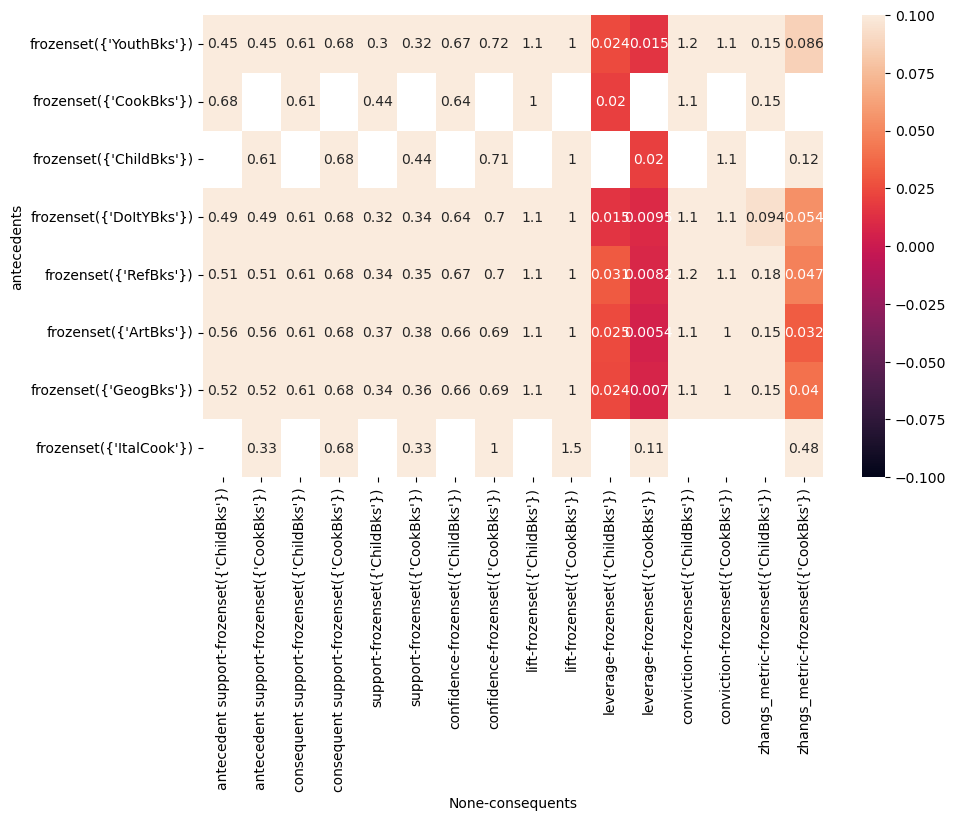

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)